# Problem 3 - Part 1

## Numerical Features Dataset:

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb

Loading the data as a pandas dataframe

In [2]:
train_file_path = './pulsar_training.csv'
test_file_path = './pulsar_test.csv'

# Load the numerical dataset from local files
data_train = pd.read_csv(train_file_path)
data_test = pd.read_csv(test_file_path)

data_cumulative = pd.concat([data_test, data_train])

# Display first 5 rows from test and train datasets
display(data_train.head(), data_test.head())

,Unnamed: 0,mean_int_pf,std_pf,ex_kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,class
0,3579,112.234375,68.694578,0.216636,-1.127850,187.653846,53.295547,-1.713697,1.896711,0
1,3580,82.960938,36.213646,0.743457,2.795152,1.473244,12.454672,12.239278,188.518602,0
2,3581,128.148438,45.805651,0.347067,0.413181,2.053512,15.642927,9.578141,108.018142,0
3,3582,51.101562,37.341297,2.838737,10.166092,2.951505,18.398169,8.914530,90.296373,1
4,3583,116.289062,50.042350,0.293090,0.251593,2.581104,16.575941,8.850971,92.531872,0


,Unnamed: 0,mean_int_pf,std_pf,ex_kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,class
0,0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


### Class representation

,Value Counts
class,
0,16259
1,1639


,Percentage
class,
0,90.842552
1,9.157448


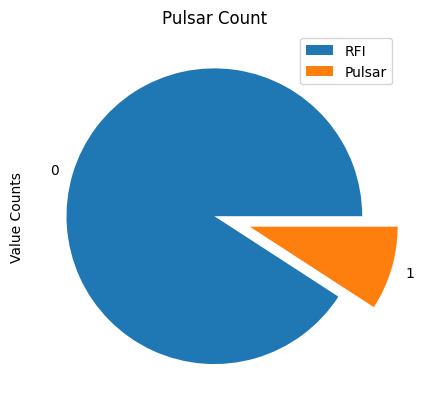

In [3]:
value_count = data_cumulative["class"].value_counts().rename("Value Counts")
value_count.plot.pie(explode=[0, 0.25])
plt.title("Pulsar Count")
plt.legend(["RFI", "Pulsar"])

total_values = value_count.sum()
# value_count["Percentage"] = value_count / total_values
display(value_count)

perc = ((value_count / total_values) * 100).rename("Percentage")
display(perc)

### Correlation
Making a correlation matrix to show correlation between all the numeric values.

In [4]:
numeric_fields = ["mean_int_pf", "std_pf", "ex_kurt_pf", "skew_pf", "mean_dm", "std_dm", "kurt_dm", "skew_dm"]
df2 = data_cumulative[numeric_fields+["class"]]
corr = df2.corr()

corr

,mean_int_pf,std_pf,ex_kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,class
mean_int_pf,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
std_pf,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
ex_kurt_pf,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
skew_pf,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
mean_dm,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
std_dm,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
kurt_dm,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
skew_dm,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


### Heatmap for Correlation Matrix
The diagonal i.e. self-correlation values have been set to zero to better visualise the relative values of other correlations.

<Axes: >

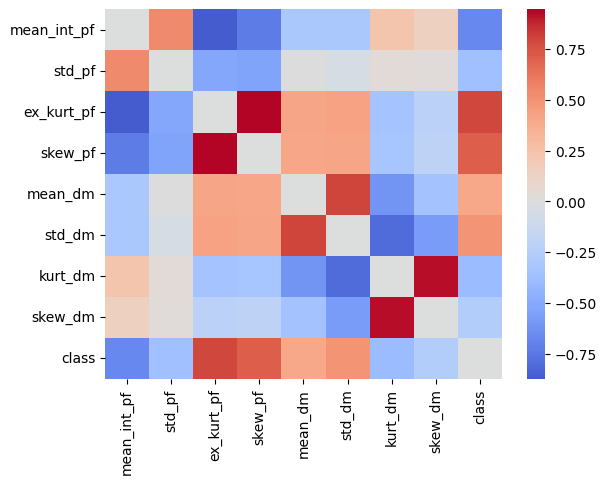

In [5]:
np.fill_diagonal(corr.values, 0)

sb.heatmap(corr, cmap='coolwarm', center=0)

In [6]:
target_corr = corr["class"].sort_values(ascending=False, key=lambda x:abs(x))
# target_corr = corr["Is Fraudulent"].sort_values()
target_corr.pop("class")
target_corr

,class
ex_kurt_pf,0.791591
skew_pf,0.709528
mean_int_pf,-0.673181
std_dm,0.491535
mean_dm,0.400876
kurt_dm,-0.390816
std_pf,-0.363708
skew_dm,-0.259117


### Handling Null Values
We check for the number of Null i.e. missing values in every field of data.

In [7]:
data_cumulative.isnull().sum()

,0
Unnamed: 0,0
mean_int_pf,0
std_pf,0
ex_kurt_pf,0
skew_pf,0
mean_dm,0
std_dm,0
kurt_dm,0
skew_dm,0
class,0


We find no missing i.e. Null values in any of the fields. <br>
*dropna() to be used if there were any*

### Splitting features and labels

In [8]:
X_train = data_train[numeric_fields]
y_train = data_train["class"]
X_test = data_test[numeric_fields]
y_test = data_test["class"]

display(X_train.head(2), y_train.head())

,mean_int_pf,std_pf,ex_kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm
0,112.234375,68.694578,0.216636,-1.127850,187.653846,53.295547,-1.713697,1.896711
1,82.960938,36.213646,0.743457,2.795152,1.473244,12.454672,12.239278,188.518602


,class
0,0
1,0
2,0
3,1
4,0


Boxplot of X_train before scaling:

[None, None, None, None, None, None, None, None]

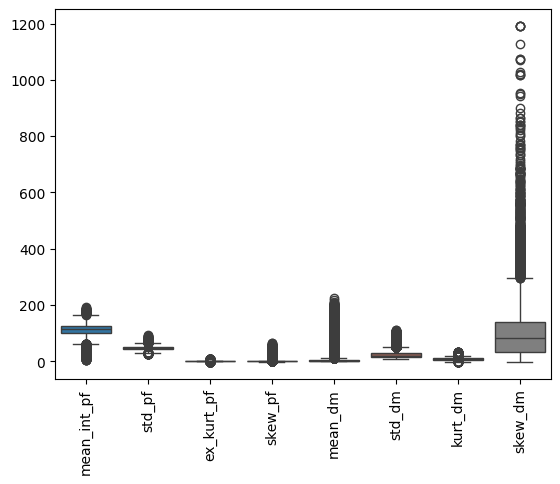

In [9]:
box_plot = sb.boxplot(X_train)
plt.setp(box_plot.get_xticklabels(), rotation=90)

### Feature scaling

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Boxplot of X_train after scaling:

[None, None, None, None, None, None, None, None]

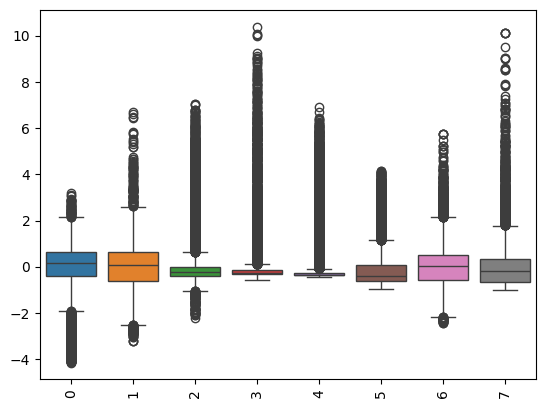

In [11]:
box_plot = sb.boxplot(X_train)
plt.setp(box_plot.get_xticklabels(), rotation=90)

## Training of a Random Forest Classifier

Now we create and train a classifier model using the Random Forest Classifier method:

In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the model:

In [13]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

Print performance metrics:

In [14]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.9735
Precision: 0.9664
Recall: 0.8061
F1 Score: 0.8790
ROC-AUC: 0.9552


### Detailed classification report:

In [15]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3151
           1       0.97      0.81      0.88       428

    accuracy                           0.97      3579
   macro avg       0.97      0.90      0.93      3579
weighted avg       0.97      0.97      0.97      3579



### Confusion Matrix

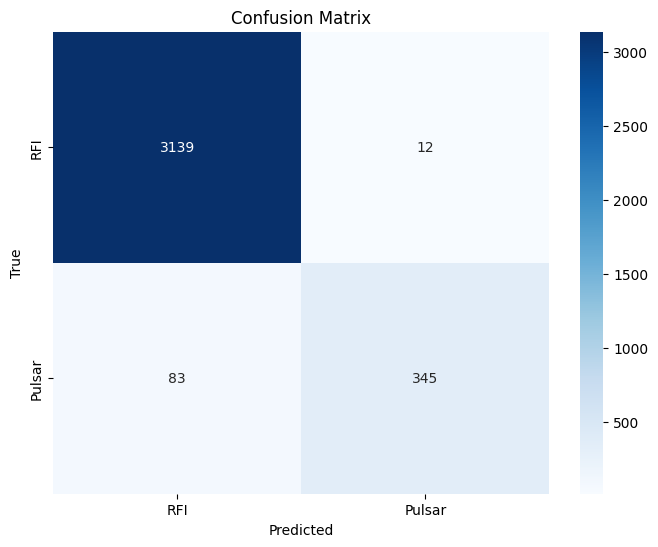

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['RFI', 'Pulsar'], yticklabels=['RFI', 'Pulsar'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### ROC Curve

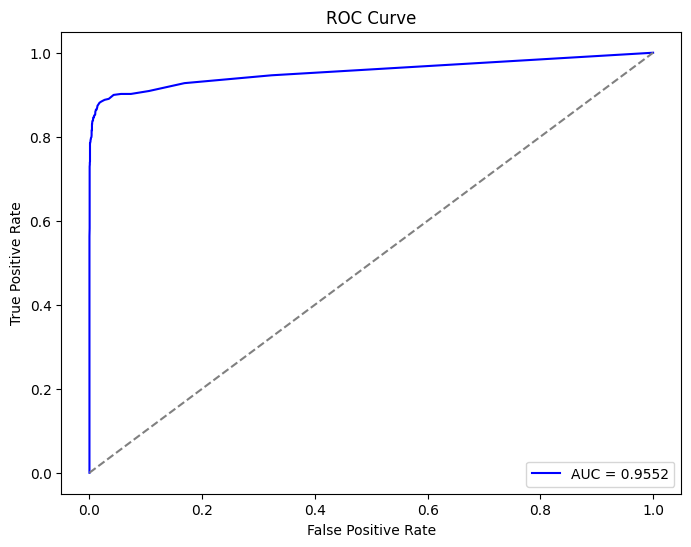

In [17]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Feature Importance

<ipython-input-18-7d109d336305>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


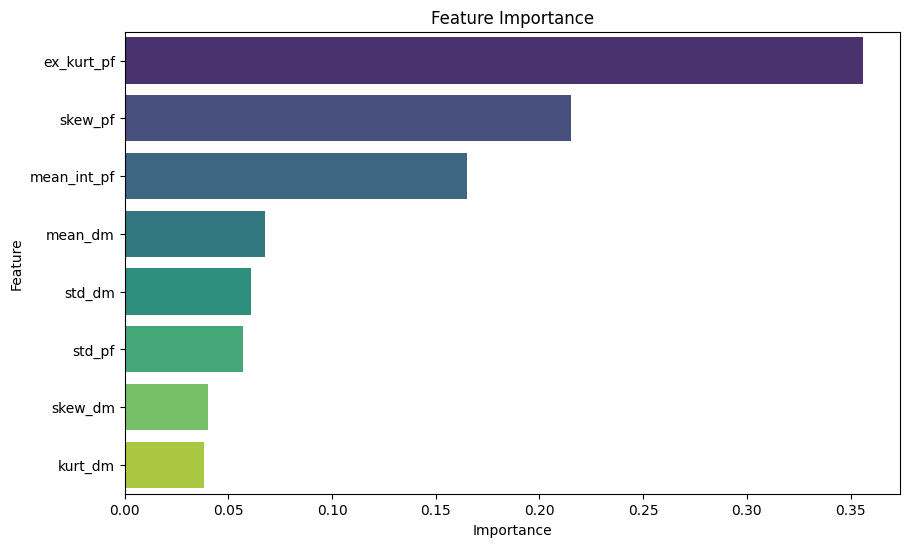

In [18]:
# Extract feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame to view feature importance
feature_names = numeric_fields
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

## Image Dataset

Import libraries:

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from htru1 import HTRU1
import torch.nn.functional as F

torch.backends.cudnn.benchmark = True

### Step 1: Load and Transform the HTRU1 Dataset

Define transformations:

In [20]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert RGB to Grayscale (1 channel)
    transforms.Resize((128, 128)),  # Resize to match CNN input
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize pixel values
])

Load the dataset:

In [21]:
train_data = HTRU1('data', train=True, download=True, transform=transform)
test_data = HTRU1('data', train=False, download=True, transform=transform)

100%|██████████| 183M/183M [00:09<00:00, 19.7MB/s]


Files already downloaded and verified


DataLoader for batching and shuffling

In [22]:
dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


### Step 2: Define the Convolutional Neural Network (CNN) Model

In [23]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 1 input channel (Grayscale)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # MaxPooling layer

        # Compute dynamically flattened size
        self.flatten_size = 64 * (128 // 4) * (128 // 4)  # (//4 because of 2 pooling layers)

        self.fc1 = nn.Linear(self.flatten_size, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 2)  # Output layer with 2 classes (Pulsars and RFI)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, self.flatten_size)  # Flatten dynamically
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Step 3: Initialize Model, Loss Function, and Optimizer

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer

### Step 4: Training the CNN Model

In [25]:
scaler = torch.cuda.amp.GradScaler()  # Enable mixed precision

num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()

    for batch_idx, (images, labels) in enumerate(dataloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        with torch.cuda.amp.autocast():  # Use mixed precision
            outputs = model(images)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()  # Scale loss before backward pass
        scaler.step(optimizer)
        scaler.update()  # Update scale factor for next step

        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss / len(dataloader)}')

<ipython-input-25-1d0053e865d8>:1: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()  # Enable mixed precision
<ipython-input-25-1d0053e865d8>:13: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Use mixed precision


Epoch 1, Loss: 0.032206163020066854
Epoch 2, Loss: 0.023565559468624764
Epoch 3, Loss: 0.019339224055495235
Epoch 4, Loss: 0.01592292906674756
Epoch 5, Loss: 0.011331300343543538
Epoch 6, Loss: 0.006608522851651705
Epoch 7, Loss: 0.004380294775455637
Epoch 8, Loss: 0.003119575978755493
Epoch 9, Loss: 0.0027399357510772336
Epoch 10, Loss: 0.002461797976657815


### Step 5: Evaluate the Model

In [26]:
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_data, [train_size, val_size])

### DataLoader for validation

In [27]:
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

model.eval()  # Switch model to evaluation mode
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in val_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

### Calculate evaluation metrics

In [28]:
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_preds)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.9991
Precision: 1.0
Recall: 0.9990815389325441
F1 Score: 0.9995405584766961
ROC-AUC: 0.9995407694662721


### Confusion Matrix

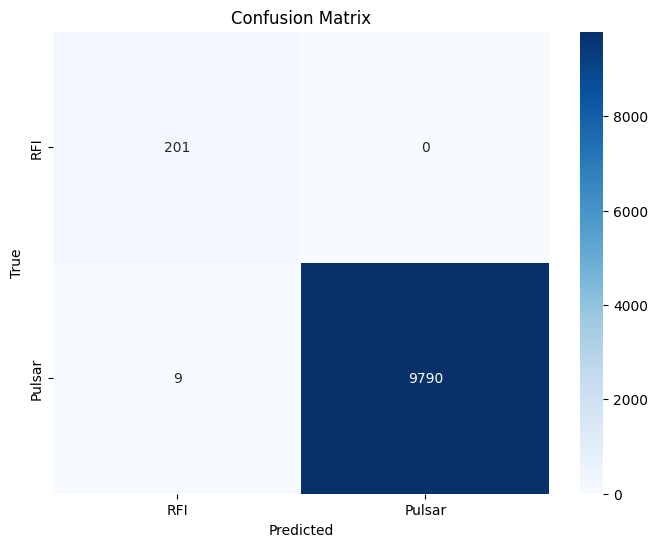

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['RFI', 'Pulsar'], yticklabels=['RFI', 'Pulsar'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### ROC Curve

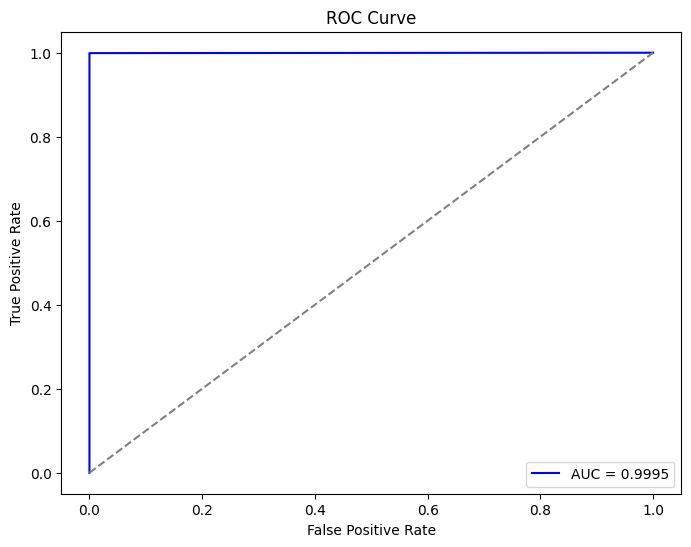

In [30]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(all_labels, all_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()